In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y=mnist['data'],mnist['target']

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

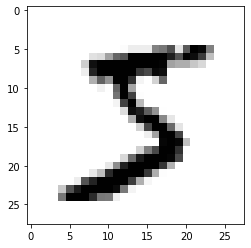

In [4]:
some_digit=X[0].reshape(28,28)
plt.imshow(some_digit,cmap='binary')

In [5]:
y=y.astype(np.uint8)
y.dtype

dtype('uint8')

In [6]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [7]:
y_train_5=y_train==5
y_test_5=y_test==5

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
sgd=SGDClassifier()
y_train_pred=cross_val_predict(sgd,X_train,y_train_5,cv=3,n_jobs=-1)


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53271,  1308],
       [  979,  4442]])

Seem's pretty dope

In [10]:
from sklearn.metrics import precision_score,recall_score
print('Precision:',precision_score(y_train_5,y_train_pred))
print('Recall:',recall_score(y_train_5,y_train_pred))

Precision: 0.7725217391304348
Recall: 0.8194060136506179


In [11]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7952734759645511

In [12]:
y_score=cross_val_predict(sgd,X_train,y_train_5,cv=3,n_jobs=-1,method='decision_function')


In [13]:
y_train_5,y_score

(array([ True, False, False, ...,  True, False, False]),
 array([  4663.93602012, -10565.86784862, -19265.90010183, ...,
          9872.86522871, -12602.0270121 , -11939.68753728]))

Text(0.5, 0, 'Recall')

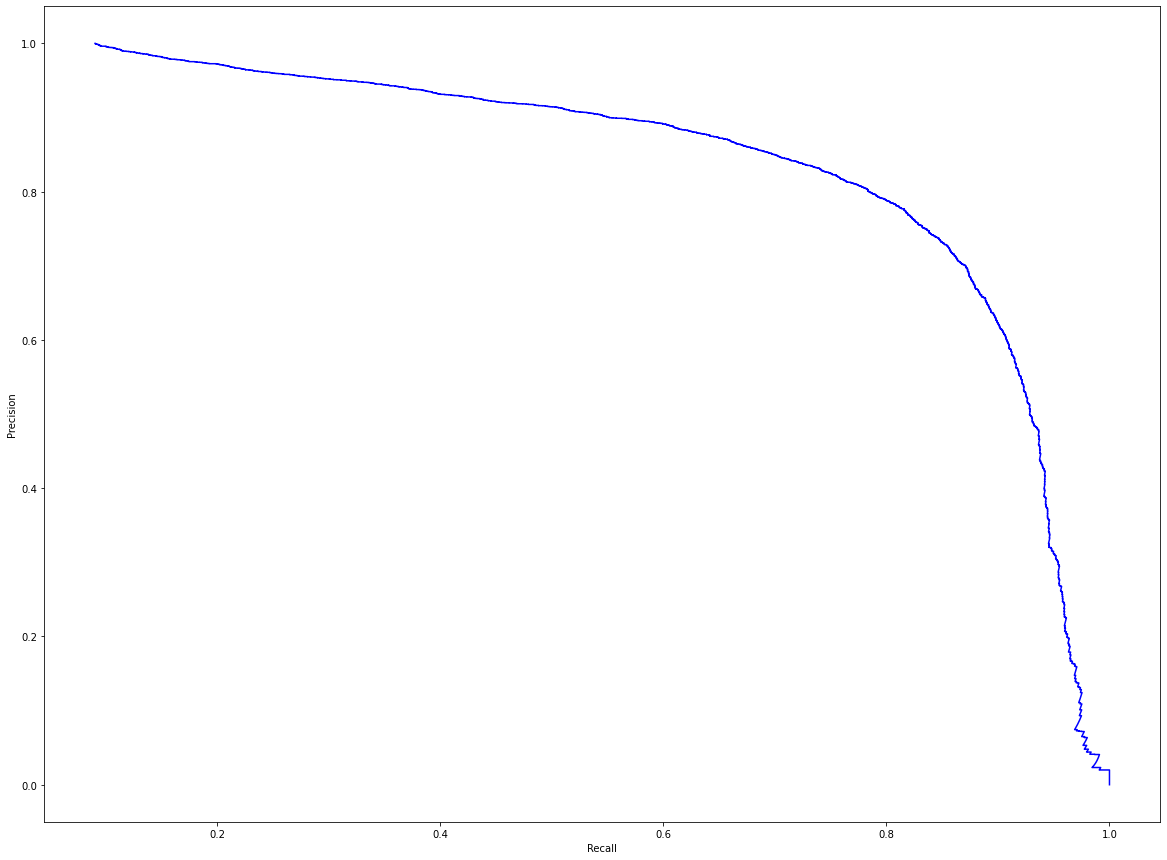

In [14]:
from sklearn.metrics import precision_recall_curve
pre,rec,thresholds=precision_recall_curve(y_train_5,y_score)
plt.figure(figsize=(20,15))
plt.plot(pre,rec,'b-')
plt.ylabel('Precision')
plt.xlabel('Recall')

In [15]:
threshold90=thresholds[np.argmax(pre>=0.9)]

In [16]:
scy=y_score>threshold90

In [17]:
precision_score(y_train_5,scy)

0.9000799360511591

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train,y_train,n_jobs=-1,scoring='accuracy')

array([0.8695    , 0.86366667, 0.88925   , 0.8875    , 0.88275   ])

In [19]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),X_train,y_train,n_jobs=-1,scoring='accuracy')

array([0.96708333, 0.96566667, 0.96416667, 0.96391667, 0.97033333])

In [20]:
y_pred=cross_val_predict(RandomForestClassifier(),X_train,y_train,cv=3,n_jobs=-1)

In [21]:
conf=confusion_matrix(y_train,y_pred)
conf

array([[5845,    2,   12,    2,    4,    8,   15,    3,   29,    3],
       [   1, 6641,   37,   16,   11,    2,    5,   11,   11,    7],
       [  30,   10, 5749,   29,   30,    1,   22,   40,   39,    8],
       [   9,    6,   86, 5796,    3,   73,    7,   54,   66,   31],
       [   8,    9,    9,    1, 5652,    2,   30,   11,   19,  101],
       [  23,    8,   12,   64,   11, 5194,   45,    6,   35,   23],
       [  22,    9,    4,    0,   10,   48, 5810,    0,   15,    0],
       [   7,   20,   62,    8,   37,    1,    0, 6040,   10,   80],
       [  13,   36,   37,   46,   27,   53,   30,    7, 5534,   68],
       [  23,   10,   15,   78,   82,   19,    5,   54,   41, 5622]])

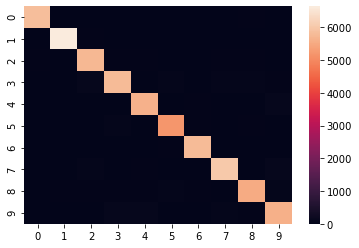

In [22]:
sns.heatmap(conf)

Making the errors more visible

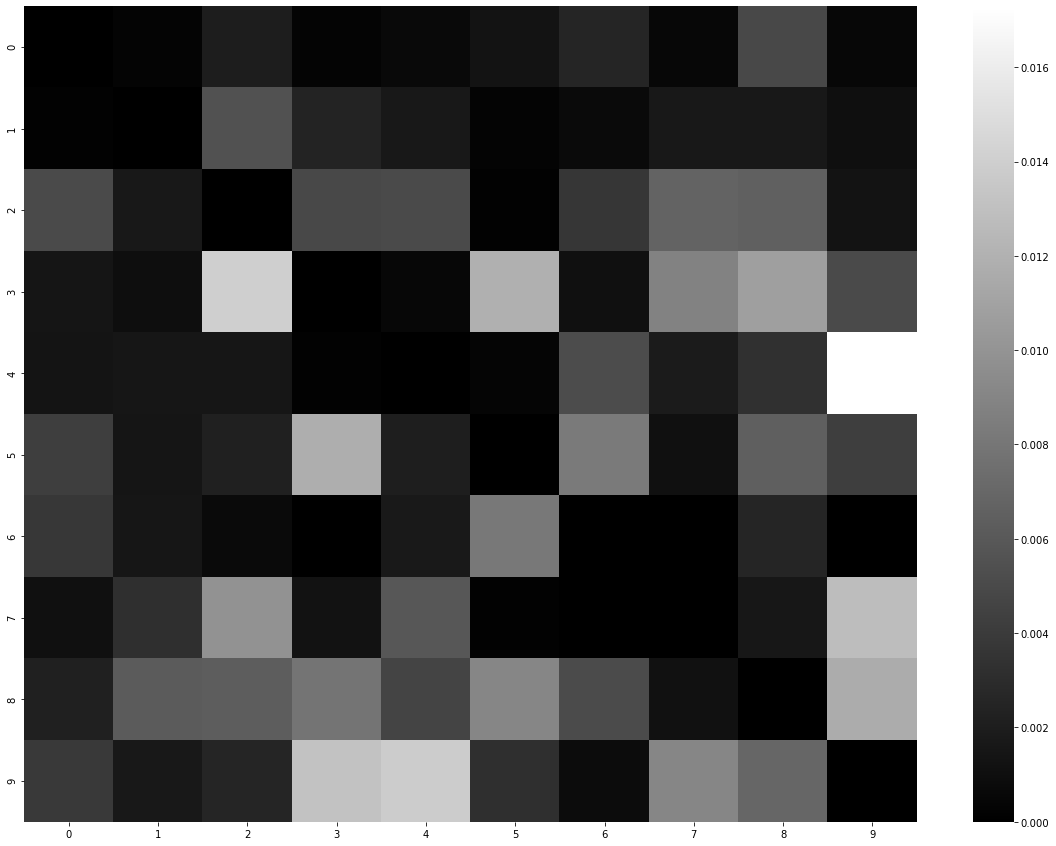

In [23]:
row_sums=conf.sum(axis=1,keepdims=True)
normalized_conf=conf/row_sums
np.fill_diagonal(normalized_conf,0)
plt.figure(figsize=(20,15))
sns.heatmap(normalized_conf,cmap='gray')

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)
pred=knn.predict(X_train)
accuracy_score(y_train,pred)

1.0

In [29]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier(n_jobs=-1)
rclf.fit(X_train,y_train)
pred=rclf.predict(X_train)
accuracy_score(y_train,pred)

1.0

In [40]:
accuracy_score(y_test,knn.predict(X_test))

0.9717

In [31]:
accuracy_score(y_test,rclf.predict(X_test))

0.9688

In [37]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(KNeighborsClassifier(),cv=3,param_grid={'n_neighbors':[3,5,7,9],'weights':['uniform', 'distance']},n_jobs=-1,verbose=2,scoring='accuracy')
gcv.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed: 159.3min remaining: 14.5min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 159.5min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [38]:
print(gcv.best_score_)
print(gcv.best_params_)

0.9693333333333333
{'n_neighbors': 3, 'weights': 'distance'}
